## Clasificación de productos en Maven Roasters

En este trabajo aplicamos un modelo de regresión logística para predecir si un producto vendido en la cafetería pertenece a la categoría de **bebidas** (`1`) o no (`0`). Este caso es ideal para la regresión logística porque se trata de un problema de **clasificación binaria**, donde queremos separar dos clases posibles.

Utilizamos variables como el precio del producto, la hora de la transacción y la tienda donde ocurrió. El objetivo es mostrar cómo, a partir de datos simples, podemos entrenar un modelo que clasifique productos según su categoría, lo cual podría usarse en tareas como recomendaciones automáticas, análisis de consumo o control de inventario.


---

In [12]:
import pandas as pd

df = pd.read_excel("Coffee-Shop-Sales.xlsx")

In [13]:
beverage_categories = ["Coffee", "Tea", "Drinking Chocolate", "Cold Drinks"]

df["is_beverage"] = df["product_category"].apply(lambda x: 1 if x in beverage_categories else 0)


df["datetime"] = pd.to_datetime(df["transaction_date"].astype(str) + " " + df["transaction_time"].astype(str))
df["hour"] = df["datetime"].dt.hour

df_model = df[["unit_price", "hour", "is_beverage"]].dropna()

In [14]:
X = df_model[["unit_price", "hour"]]
y = df_model["is_beverage"]

In [15]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,is_beverage,datetime,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,2023-01-01 07:06:11,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,2023-01-01 07:08:56,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,2023-01-01 07:14:04,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,2023-01-01 07:20:24,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,2023-01-01 07:22:41,7


---

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20      6855
           1       0.79      1.00      0.88     22969

    accuracy                           0.80     29824
   macro avg       0.89      0.55      0.54     29824
weighted avg       0.84      0.80      0.72     29824



---

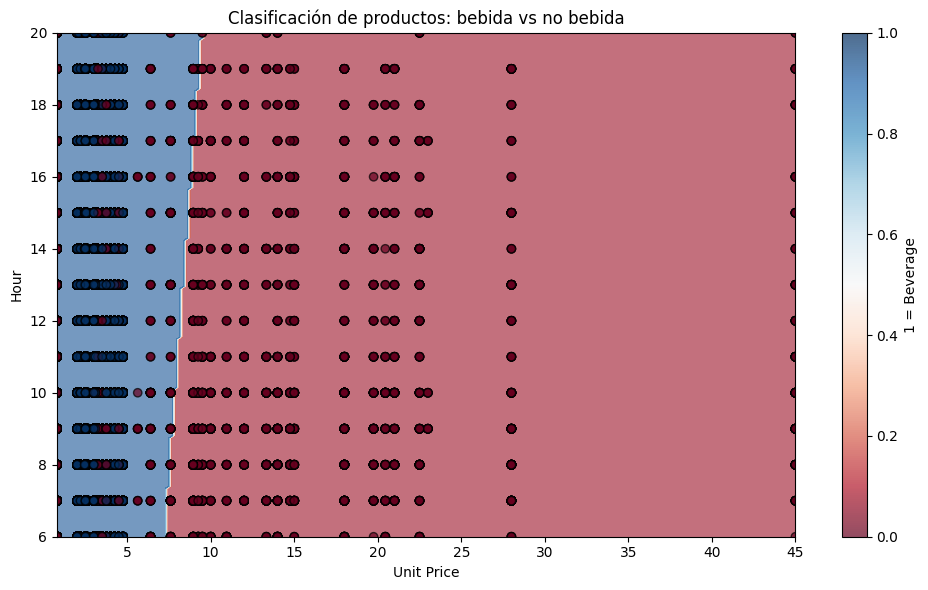

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X["unit_price"].min(), X["unit_price"].max()
y_min, y_max = X["hour"].min(), X["hour"].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

grid_df = pd.DataFrame(grid, columns=["unit_price", "hour"])
probs = model.predict(grid_df).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.6)
plt.scatter(X["unit_price"], X["hour"], c=y, cmap="RdBu", edgecolors="k", alpha=0.7)
plt.xlabel("Unit Price")
plt.ylabel("Hour")
plt.title("Clasificación de productos: bebida vs no bebida")
plt.colorbar(label="1 = Beverage")
plt.tight_layout()
plt.savefig("beverage_classification_plot.png")
plt.show()